# The Hired Hand

**Apprentissage Automatique pour la Prédiction de Changement d'Emploi**

---

## Table des Matières

1. [Description du Projet et du Jeu de Données](#1-description-du-projet-et-du-jeu-de-données)
   - [1.1 Objectif du Projet](#11-objectif-du-projet)
   - [1.2 Solutions Existantes](#12-solutions-existantes)
   - [1.3 Informations sur le Jeu de Données](#13-informations-sur-le-jeu-de-données)
   - [1.4 Hypothèses Initiales](#14-hypothèses-initiales)
2. [Importation des Bibliothèques](#2-importation-des-bibliothèques)
3. [Accès aux Données](#3-accès-aux-données)
4. [Analyse Exploratoire du Jeu de Données](#4-analyse-exploratoire-du-jeu-de-données)
   - [4.1 Analyse des Métadonnées](#41-analyse-des-métadonnées)
   - [4.2 Analyse des Valeurs Manquantes](#42-analyse-des-valeurs-manquantes)
   - [4.3 Distributions et Valeurs Aberrantes](#43-distributions-et-valeurs-aberrantes)
   - [4.4 Étude de la Variable Cible](#44-étude-de-la-variable-cible)
   - [4.5 Corrélations](#45-corrélations)
   - [4.6 Feature Engineering](#46-feature-engineering)
   - [4.7 Synthèse EDA et Vérification des Hypothèses](#47-synthèse-eda-et-vérification-des-hypothèses)
5. [Modélisation](#5-modélisation)
   - [5.1 Préparation des Données](#51-préparation-des-données)
   - [5.2 Modèles de Référence](#52-modèles-de-référence)
   - [5.3 Optimisation](#53-optimisation)
   - [5.4 Évaluation Finale](#54-évaluation-finale)
6. [Analyse Critique](#6-analyse-critique)
   - [6.1 Analyse des Erreurs](#61-analyse-des-erreurs)
   - [6.2 Feature Importance](#62-feature-importance)
   - [6.3 Retour sur les Hypothèses](#63-retour-sur-les-hypothèses)
7. [Conclusion](#7-conclusion)

---

## 1. Description du Projet et du Jeu de Données

### 1.1 Objectif du Projet

Ce projet applique des techniques d'Apprentissage Automatique pour prédire si un candidat cherche activement un nouvel emploi.

**Contexte métier :** Une entreprise de formation en Data Science souhaite identifier parmi ses participants ceux qui cherchent un emploi, afin de :
- Mieux cibler les candidats pour des offres d'emploi
- Comprendre les facteurs qui poussent à chercher un nouvel emploi
- Optimiser les ressources de placement

**Objectifs techniques :**
- Construire un modèle de classification binaire (cherche emploi vs ne cherche pas)
- Identifier les facteurs clés influençant la recherche d'emploi
- Appliquer une méthodologie ML rigoureuse

### 1.2 Solutions Existantes

**Approche Traditionnelle :**
Les départements RH utilisent des filtres manuels (expérience, diplôme, localisation) pour identifier les candidats. Cette approche est subjective et ne capture pas les interactions complexes entre facteurs.

**Solutions ML courantes :**
- **Modèles de référence :** Régression Logistique, KNN
- **Modèles ensemblistes :** Random Forest, XGBoost, Gradient Boosting

**Constats de la littérature :**
- Les méthodes ensemblistes surpassent généralement les modèles simples
- L'ingénierie des caractéristiques impacte significativement les performances
- La gestion du déséquilibre des classes est cruciale

### 1.3 Informations sur le Jeu de Données

**Source :** [HR Analytics: Job Change of Data Scientists](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists)

**Caractéristiques :**
- **Taille :** ~19 000 instances, 14 caractéristiques
- **Type :** Données tabulaires mixtes (numériques et catégorielles)
- **Cible :** `target` (1 = cherche un emploi, 0 = ne cherche pas)

**Variables principales :**
| Variable | Description |
|----------|-------------|
| `city_development_index` | Indice de développement de la ville |
| `experience` | Années d'expérience |
| `company_size` | Taille de l'entreprise actuelle |
| `company_type` | Type d'entreprise |
| `last_new_job` | Années depuis le dernier changement d'emploi |
| `training_hours` | Heures de formation suivies |
| `education_level` | Niveau d'éducation |
| `major_discipline` | Discipline principale |

### 1.4 Hypothèses Initiales

Avant d'explorer les données, voici nos hypothèses sur les facteurs qui influenceront la recherche d'emploi :

**H1 - Expérience professionnelle**
> Les candidats avec plus d'expérience seront moins enclins à chercher un nouvel emploi (stabilité de carrière).

**H2 - Niveau de développement de la ville**
> Les candidats dans des villes moins développées chercheront plus activement (moins d'opportunités locales).

**H3 - Situation professionnelle actuelle**
> Les candidats sans emploi actuel (`company_size` manquant) chercheront logiquement plus un emploi.

**H4 - Mobilité passée**
> Les candidats ayant changé d'emploi récemment (`last_new_job` faible) seront plus mobiles.

**H5 - Formation**
> Les candidats avec un niveau d'éducation élevé (Graduate, Masters) seront plus mobiles sur le marché.

---

➡️ **Ces hypothèses seront confrontées aux résultats en section 6.3**

---

## 2. Importation des Bibliothèques

In [1]:
# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Configuration des visualisations
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
sns.set_style('whitegrid')

---

## 3. Accès aux Données

In [2]:
DATA_URL = "https://raw.githubusercontent.com/Angry-Jay/ML_TheHiredHand/refs/heads/main/aug_train.csv"

df = pd.read_csv(DATA_URL)

print(f"Dataset chargé : {df.shape[0]} lignes, {df.shape[1]} colonnes")
df.head()

Dataset chargé : 19158 lignes, 14 colonnes


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


---

## 4. Analyse Exploratoire du Jeu de Données

### 4.1 Analyse des Métadonnées

Objectifs de cette section :
- Comprendre la structure du dataset (dimensions, types)
- Détecter les problèmes de qualité (doublons, colonnes inutiles)
- Vérifier l'absence de fuite de données

In [3]:
# Structure du dataset
print(f"Dimensions : {df.shape[0]} lignes x {df.shape[1]} colonnes")
print(f"Doublons : {df.duplicated().sum()}")
print()
df.info()

Dimensions : 19158 lignes x 14 colonnes
Doublons : 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-nul

In [4]:
# Séparation par types
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numériques ({len(num_cols)}) : {num_cols}")
print(f"Catégorielles ({len(cat_cols)}) : {cat_cols}")

Numériques (4) : ['enrollee_id', 'city_development_index', 'training_hours', 'target']
Catégorielles (10) : ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [5]:
# Statistiques descriptives (numériques)
df[num_cols].describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
# Cardinalité des variables catégorielles
print("Cardinalité des variables catégorielles :")
for col in cat_cols:
    print(f"  {col}: {df[col].nunique()} valeurs uniques")

Cardinalité des variables catégorielles :
  city: 123 valeurs uniques
  gender: 3 valeurs uniques
  relevent_experience: 2 valeurs uniques
  enrolled_university: 3 valeurs uniques
  education_level: 5 valeurs uniques
  major_discipline: 6 valeurs uniques
  experience: 22 valeurs uniques
  company_size: 8 valeurs uniques
  company_type: 6 valeurs uniques
  last_new_job: 6 valeurs uniques


In [7]:
# Vérification de la fuite de données
suspect_keywords = ['salary', 'offer', 'hired', 'compensation']
leakage_cols = [col for col in df.columns if any(kw in col.lower() for kw in suspect_keywords)]

if leakage_cols:
    print(f"ATTENTION - Colonnes suspectes : {leakage_cols}")
else:
    print("Pas de fuite de données détectée.")

Pas de fuite de données détectée.


**Résumé 4.1 :**
- **19 158 instances**, 14 colonnes (13 prédicteurs + 1 cible)
- **Aucun doublon**
- **2 variables numériques** : `city_development_index`, `training_hours`
- **10 variables catégorielles** dont `city` (123 valeurs) = haute cardinalité
- `enrollee_id` = identifiant à exclure de la modélisation
- **Pas de fuite de données** détectée

### 4.2 Analyse des Valeurs Manquantes

In [8]:
# Valeurs manquantes par colonne
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Manquants': missing,
    'Pourcentage': missing_pct
}).query('Manquants > 0').sort_values('Pourcentage', ascending=False)

print(f"Colonnes avec valeurs manquantes : {len(missing_df)} / {len(df.columns)}")
print(f"Lignes affectées : {df.isnull().any(axis=1).sum()} ({df.isnull().any(axis=1).sum()/len(df)*100:.1f}%)")
print()
missing_df

Colonnes avec valeurs manquantes : 8 / 14
Lignes affectées : 10203 (53.3%)



,Manquants,Pourcentage
company_type,6140,32.05
company_size,5938,30.99
gender,4508,23.53
major_discipline,2813,14.68
education_level,460,2.40
last_new_job,423,2.21
enrolled_university,386,2.01
experience,65,0.34


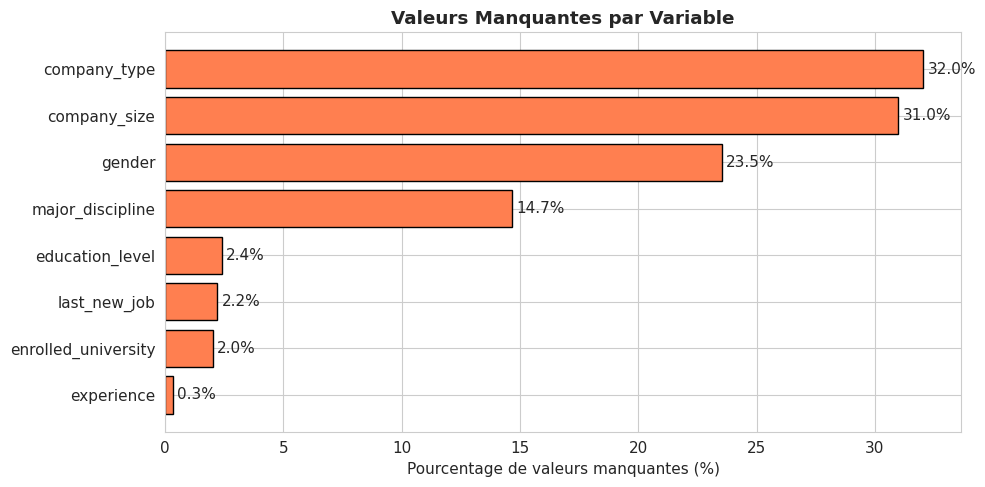

In [9]:
# Visualisation des valeurs manquantes
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(missing_df.index, missing_df['Pourcentage'], color='coral', edgecolor='black')
ax.set_xlabel('Pourcentage de valeurs manquantes (%)')
ax.set_title('Valeurs Manquantes par Variable', fontweight='bold')
ax.bar_label(bars, fmt='%.1f%%', padding=3)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [23]:
# Co-occurrence des valeurs manquantes (insight clé)
both_missing = (df['company_size'].isnull() & df['company_type'].isnull()).sum()
print(f"company_size ET company_type manquantes ensemble : {both_missing} ({both_missing/len(df)*100:.1f}%)")

company_size ET company_type manquantes ensemble : 5360 (28.0%)


**Résumé 4.2 :**
- **8 colonnes** sur 14 ont des valeurs manquantes
- **53% des lignes** sont affectées (10 203 / 19 158)
- Les plus impactées : `company_type` (32%), `company_size` (31%), `gender` (24%)
- **Pattern clé** : `company_size` + `company_type` manquantes ensemble → candidats sans emploi actuel
- **Stratégie** : créer une catégorie "Non employé" plutôt qu'imputer (le manquant est informatif)

### 4.3 Distributions et Valeurs Aberrantes

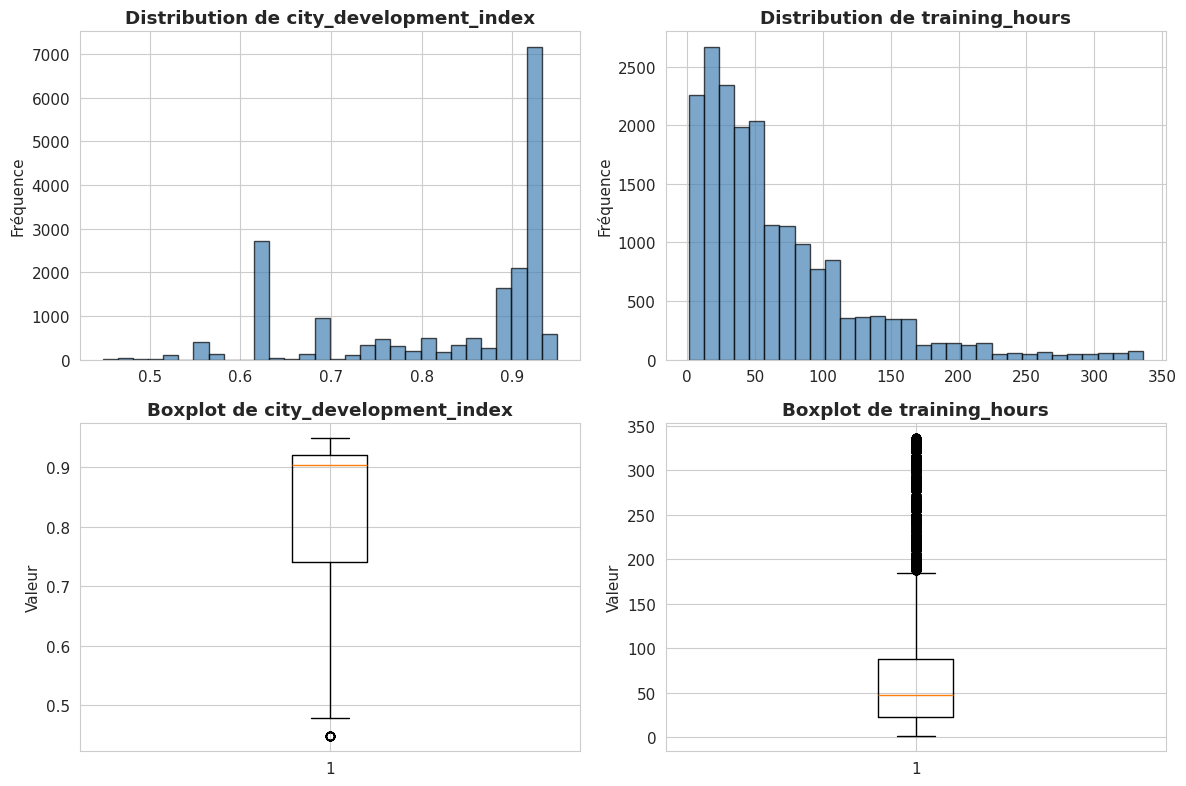

In [24]:
# Variables numériques à analyser (excluant enrollee_id et target)
num_features = ['city_development_index', 'training_hours']

# Histogrammes + Boxplots côte à côte
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for idx, col in enumerate(num_features):
    # Histogramme
    axes[0, idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0, idx].set_title(f'Distribution de {col}', fontweight='bold')
    axes[0, idx].set_ylabel('Fréquence')
    
    # Boxplot
    axes[1, idx].boxplot(df[col].dropna(), vert=True)
    axes[1, idx].set_title(f'Boxplot de {col}', fontweight='bold')
    axes[1, idx].set_ylabel('Valeur')

plt.tight_layout()
plt.show()

In [25]:
# Détection des outliers (méthode IQR)
print("Outliers détectés (méthode IQR) :")
for col in num_features:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"  {col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

Outliers détectés (méthode IQR) :
  city_development_index: 17 outliers (0.1%)
  training_hours: 984 outliers (5.1%)


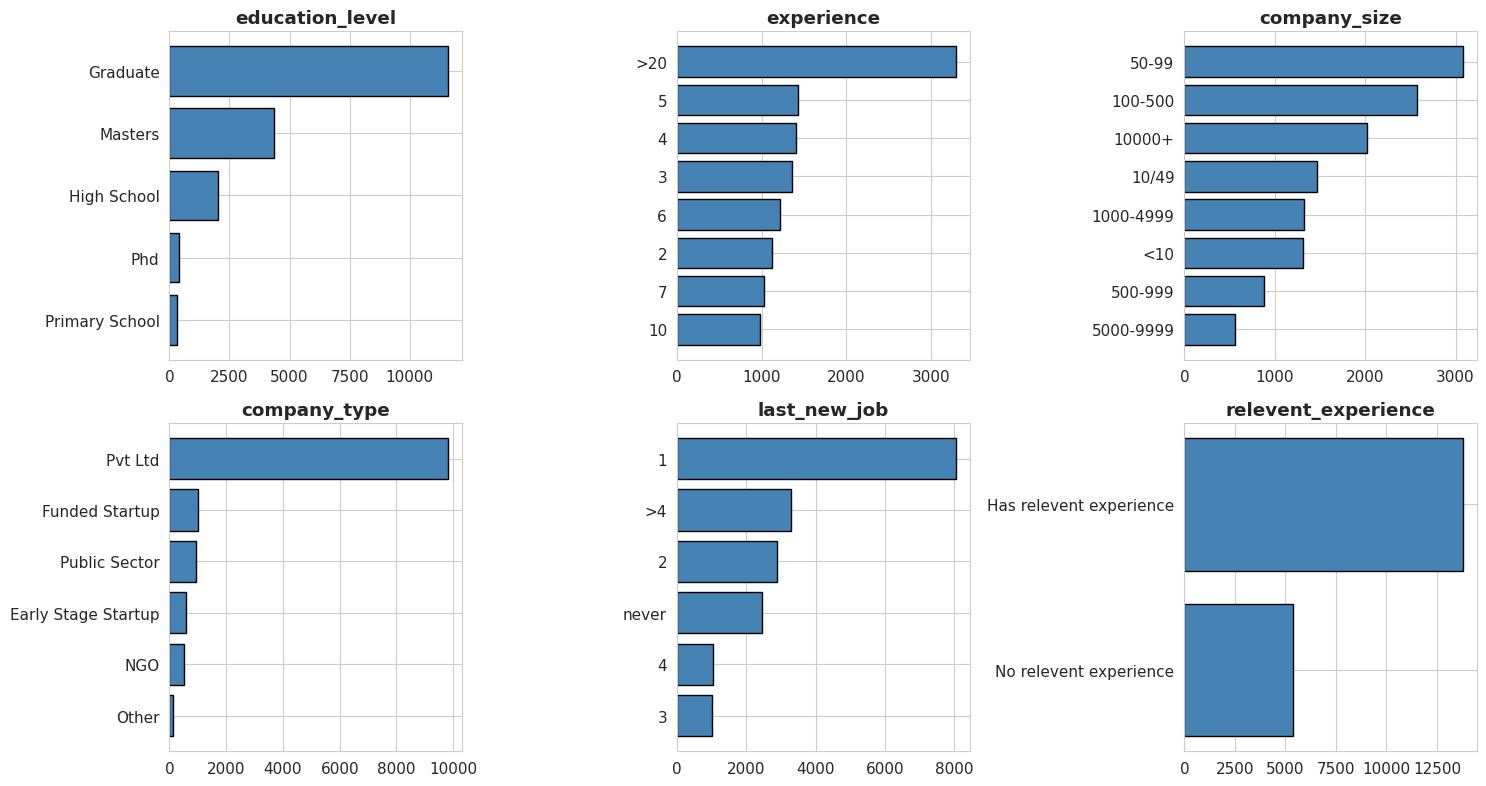

In [26]:
# Distribution des principales variables catégorielles
cat_to_plot = ['education_level', 'experience', 'company_size', 'company_type', 'last_new_job', 'relevent_experience']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(cat_to_plot):
    counts = df[col].value_counts()
    if len(counts) > 8:
        counts = counts.head(8)
    axes[idx].barh(counts.index.astype(str), counts.values, color='steelblue', edgecolor='black')
    axes[idx].set_title(col, fontweight='bold')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

**Résumé 4.3 :**

**Variables numériques :**
- `city_development_index` : distribution asymétrique gauche (majorité villes développées ~0.9)
- `training_hours` : distribution asymétrique droite (mode ~50h, outliers jusqu'à 336h)
- **Outliers conservés** : ils représentent des comportements réels (engagement élevé, villes peu développées)

**Variables catégorielles - déséquilibres notables :**
- `education_level` : dominé par Graduate (60%)
- `company_type` : dominé par Pvt Ltd (83%)
- `relevent_experience` : 72% ont une expérience pertinente

### 4.4 Étude de la Variable Cible

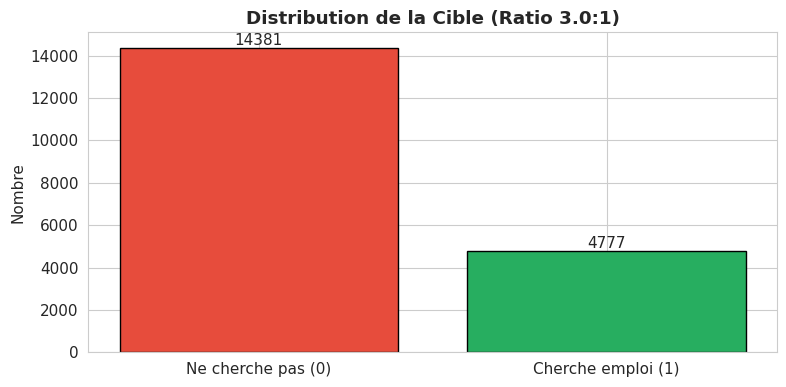

Classe 0 (ne cherche pas) : 14381 (75.1%)
Classe 1 (cherche emploi) : 4777 (24.9%)
Ratio de déséquilibre : 3.01:1


In [27]:
# Distribution de la variable cible
target_counts = df['target'].value_counts()
ratio = target_counts.max() / target_counts.min()

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(['Ne cherche pas (0)', 'Cherche emploi (1)'], target_counts.values, 
              color=['#e74c3c', '#27ae60'], edgecolor='black')
ax.bar_label(bars, fmt='%d')
ax.set_title(f'Distribution de la Cible (Ratio {ratio:.1f}:1)', fontweight='bold')
ax.set_ylabel('Nombre')
plt.tight_layout()
plt.show()

print(f"Classe 0 (ne cherche pas) : {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"Classe 1 (cherche emploi) : {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")
print(f"Ratio de déséquilibre : {ratio:.2f}:1")

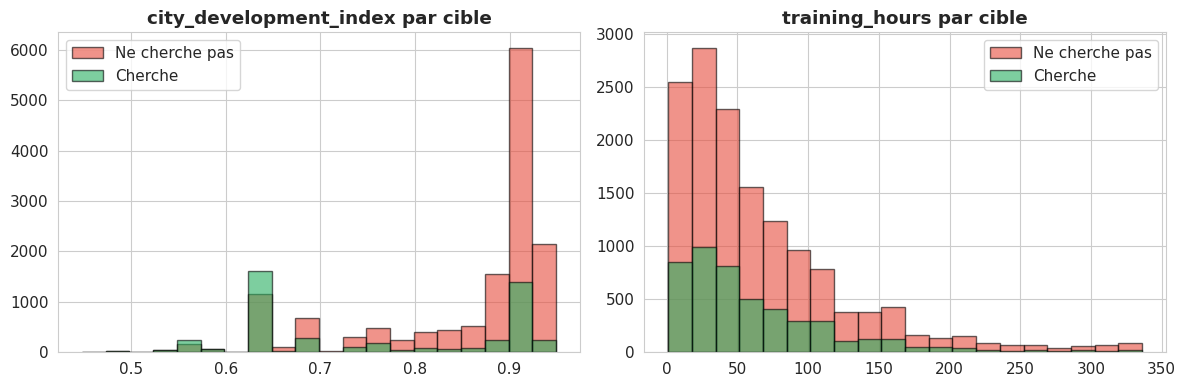

In [28]:
# Comparaison des distributions numériques par cible
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for idx, col in enumerate(num_features):
    for target_val, color, label in [(0, '#e74c3c', 'Ne cherche pas'), (1, '#27ae60', 'Cherche')]:
        data = df[df['target'] == target_val][col]
        axes[idx].hist(data, bins=20, alpha=0.6, color=color, label=label, edgecolor='black')
    axes[idx].set_title(f'{col} par cible', fontweight='bold')
    axes[idx].legend()

plt.tight_layout()
plt.show()

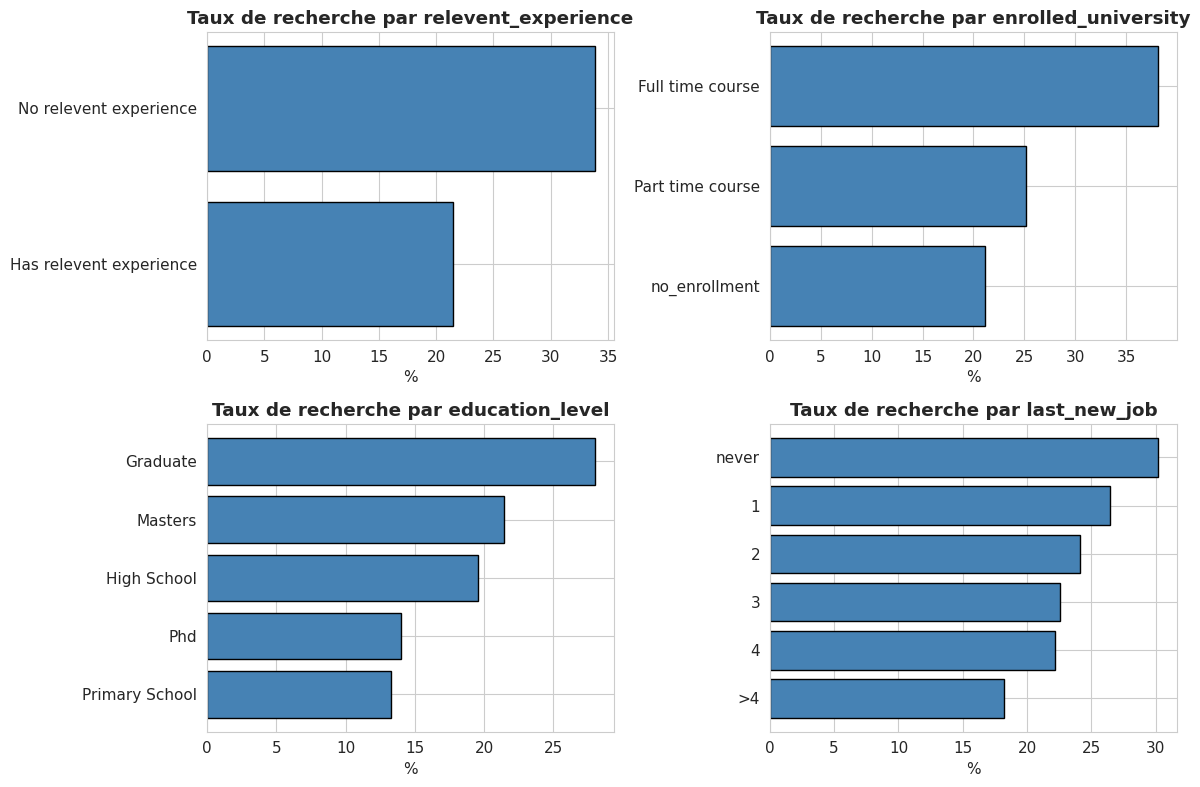

In [29]:
# Taux de recherche d'emploi par variable catégorielle clé
key_cats = ['relevent_experience', 'enrolled_university', 'education_level', 'last_new_job']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, col in enumerate(key_cats):
    rates = df.groupby(col)['target'].mean().sort_values(ascending=False) * 100
    axes[idx].barh(rates.index.astype(str), rates.values, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'Taux de recherche par {col}', fontweight='bold')
    axes[idx].set_xlabel('%')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

**Résumé 4.4 :**

**Déséquilibre des classes :** Ratio **3:1** (75% / 25%) → nécessite `class_weight='balanced'`

**Variables numériques :**
- `city_development_index` : **discriminant** - CDI faible → plus de chercheurs (confirme H2)
- `training_hours` : **peu discriminant** - distributions similaires entre classes

**Variables catégorielles - facteurs discriminants :**
| Variable | Observation |
|----------|-------------|
| `relevent_experience` | Sans exp. → 34% vs avec exp. → 22% |
| `enrolled_university` | Temps plein → 38%, non inscrit → 21% |
| `education_level` | Graduate → 28% (paradoxe : PhD → 14%) |
| `last_new_job` | "never" → 30%, >4 ans → 18% |

**Profil type du chercheur d'emploi :**
> Étudiant temps plein, niveau Graduate, sans expérience pertinente, premier emploi ou changement récent.

### 4.5 Corrélations

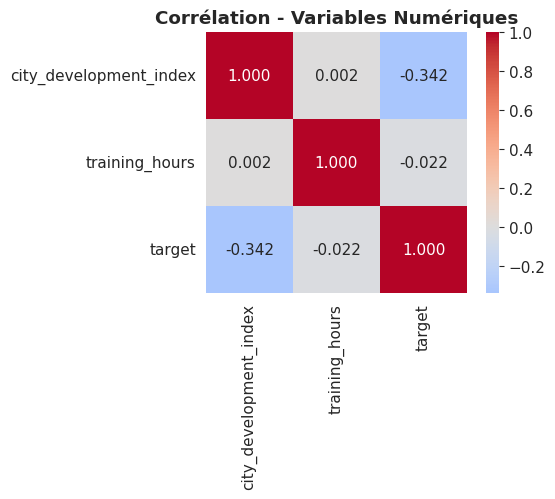

In [32]:
# Corrélation des variables numériques (Pearson)
num_for_corr = ['city_development_index', 'training_hours', 'target']
corr_matrix = df[num_for_corr].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.3f')
plt.title('Corrélation - Variables Numériques', fontweight='bold')
plt.tight_layout()
plt.show()

#### Association des variables catégorielles avec la cible (V de Cramér)

Le V de Cramér mesure la force d'association entre variables catégorielles :
- **< 0.1** : Négligeable | **0.1-0.3** : Faible | **> 0.3** : Modérée à forte

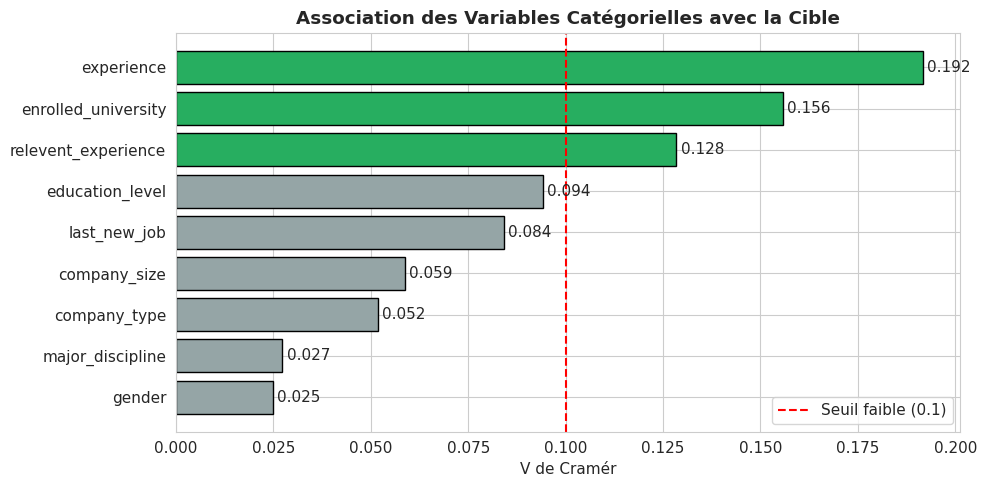

In [33]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

# Variables catégorielles à analyser (excluant identifiants)
categorical_cols = ['gender', 'relevent_experience', 'enrolled_university', 
                    'education_level', 'major_discipline', 'experience',
                    'company_size', 'company_type', 'last_new_job']

# Calcul du V de Cramér pour chaque variable catégorielle vs target
cramer_results = []
for col in categorical_cols:
    df_clean = df[[col, 'target']].dropna()
    contingency = pd.crosstab(df_clean[col], df_clean['target'])
    cramer_v = association(contingency, method='cramer')
    cramer_results.append({'Variable': col, 'V de Cramér': cramer_v})

cramer_df = pd.DataFrame(cramer_results).sort_values('V de Cramér', ascending=False)

# Visualisation
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['#27ae60' if v > 0.1 else '#95a5a6' for v in cramer_df['V de Cramér']]
bars = ax.barh(cramer_df['Variable'], cramer_df['V de Cramér'], color=colors, edgecolor='black')
ax.axvline(x=0.1, color='red', linestyle='--', label='Seuil faible (0.1)')
ax.set_xlabel("V de Cramér")
ax.set_title("Association des Variables Catégorielles avec la Cible", fontweight='bold')
ax.bar_label(bars, fmt='%.3f', padding=3)
ax.legend()
ax.invert_yaxis()
plt.tight_layout()
plt.show()

**Résumé 4.5 :**

#### Analyse de la Matrice de Corrélation

- **Lien négatif fort avec le CDI (-0.342)** : L'indice de développement de la ville est la variable numérique la plus prédictive. Le coefficient négatif confirme que plus le CDI est élevé, moins les candidats cherchent à partir.

- **Indépendance des heures de formation (-0.022)** : La corrélation est proche de zéro, confirmant que le volume de formation n'aide pas à prédire l'intention de changement d'emploi.

- **Absence de multicolinéarité** : Quasi aucune corrélation entre CDI et training_hours (0.002) → ces variables apportent des informations distinctes.

#### Hiérarchie des Variables Catégorielles (V de Cramér)

**Prédicteurs clés (V > 0.1)** :
| Variable | V de Cramér | Observation |
|----------|-------------|-------------|
| `experience` | **0.192** | Variable catégorielle la plus déterminante |
| `enrolled_university` | **0.156** | Statut universitaire = indicateur majeur |
| `relevent_experience` | **0.128** | Complète le podium |

**Variables secondaires** : `education_level` (0.09) et `last_new_job` (0.08) sont juste sous le seuil mais restent plus informatives que `gender` ou `major_discipline`.

#### Synthèse Croisée

> **Le CDI est roi** : Avec r = -0.342, c'est le facteur numérique le plus puissant. Les candidats des villes moins développées sont les plus mobiles.
> 
> **Top 3 catégorielles** : `experience`, `enrolled_university`, `relevent_experience` - tous liés à la situation professionnelle actuelle.

### 4.6 Feature Engineering

Création de nouvelles variables pour améliorer la séparabilité des classes.

In [14]:
# À compléter

### 4.7 Synthèse EDA et Vérification des Hypothèses

In [15]:
# À compléter

---

## 5. Modélisation

### 5.1 Préparation des Données

In [16]:
# À compléter

### 5.2 Modèles de Référence

In [17]:
# À compléter

### 5.3 Optimisation

In [18]:
# À compléter

### 5.4 Évaluation Finale

In [19]:
# À compléter

---

## 6. Analyse Critique

### 6.1 Analyse des Erreurs

In [20]:
# À compléter

### 6.2 Feature Importance

In [21]:
# À compléter

### 6.3 Retour sur les Hypothèses

Confrontation des hypothèses initiales (section 1.4) avec les résultats obtenus.

In [22]:
# À compléter

---

## 7. Conclusion

À compléter